In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

os.chdir("../../")

In [2]:

results_folder = "data/ragas_results"
# Load CSV files
df1 = pd.read_csv(f'{results_folder}/bm_baseline_benchmark_results.csv')
df2 = pd.read_csv(f'{results_folder}/bm_prompt_engineering_optimization_results.csv')

               Metric  Baseline_Average  Prompt_eng_opt_Average  \
0  answer_correctness          0.689010                0.672763   
1        faithfulness          0.863333                0.857018   
2    answer_relevancy          0.846870                0.820855   
3   context_precision          0.980000                0.964792   

   Baseline_Highest  Prompt_eng_opt_Highest  Baseline_Lowest  \
0               1.0                1.000000         0.229628   
1               1.0                1.000000         0.200000   
2               1.0                0.983752         0.000000   
3               1.0                1.000000         0.833333   

   Prompt_eng_opt_Lowest  
0               0.183700  
1               0.000000  
2               0.000000  
3               0.679167  


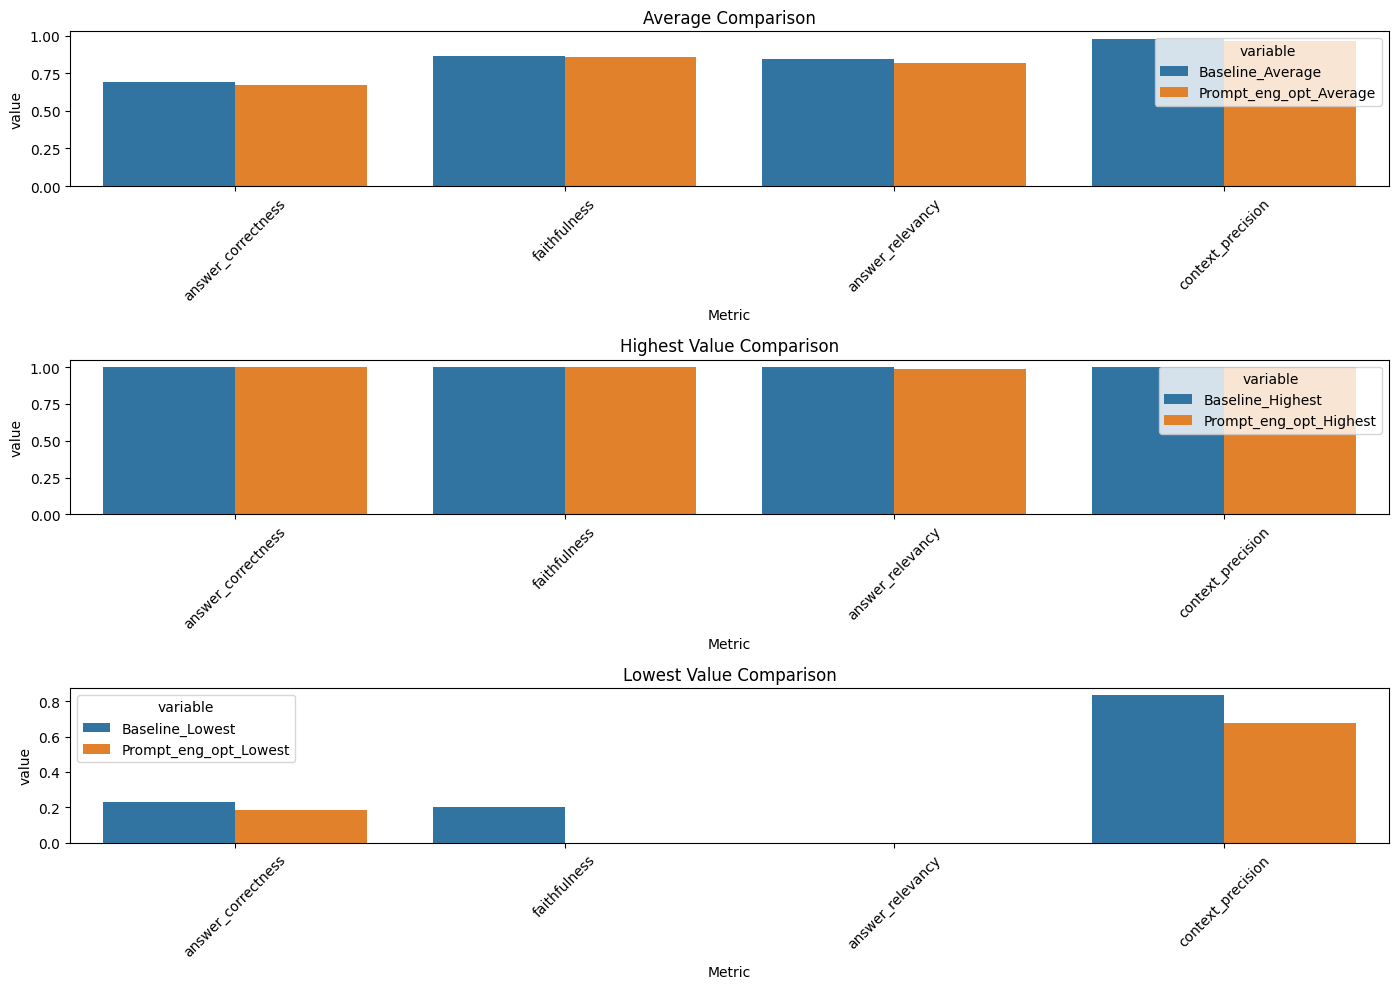

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
baseline_df = df1.copy()
prompt_eng_df = df2.copy()

# Drop the unnamed index column if it exists
baseline_df = baseline_df.drop(columns=['Unnamed: 0'], errors='ignore')
prompt_eng_df = prompt_eng_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Define the numeric columns to focus on
numeric_columns = ['answer_correctness', 'faithfulness', 'answer_relevancy', 'context_precision']

# Calculate summary statistics
summary_stats = {
  'Metric': [],
  'Baseline_Average': [],
  'Prompt_eng_opt_Average': [],
  'Baseline_Highest': [],
  'Prompt_eng_opt_Highest': [],
  'Baseline_Lowest': [],
  'Prompt_eng_opt_Lowest': []
}

for column in numeric_columns:
  summary_stats['Metric'].append(column)
  summary_stats['Baseline_Average'].append(baseline_df[column].mean())
  summary_stats['Prompt_eng_opt_Average'].append(prompt_eng_df[column].mean())
  summary_stats['Baseline_Highest'].append(baseline_df[column].max())
  summary_stats['Prompt_eng_opt_Highest'].append(prompt_eng_df[column].max())
  summary_stats['Baseline_Lowest'].append(baseline_df[column].min())
  summary_stats['Prompt_eng_opt_Lowest'].append(prompt_eng_df[column].min())

summary_df = pd.DataFrame(summary_stats)

# Print summary statistics
print(summary_df)

# Visualization
plt.figure(figsize=(14, 10))

# Average comparison
plt.subplot(3, 1, 1)
sns.barplot(x='Metric', y='value', hue='variable', data=pd.melt(summary_df, id_vars=['Metric'], value_vars=['Baseline_Average', 'Prompt_eng_opt_Average']))
plt.title('Average Comparison')
plt.xticks(rotation=45)

# Highest value comparison
plt.subplot(3, 1, 2)
sns.barplot(x='Metric', y='value', hue='variable', data=pd.melt(summary_df, id_vars=['Metric'], value_vars=['Baseline_Highest', 'Prompt_eng_opt_Highest']))
plt.title('Highest Value Comparison')
plt.xticks(rotation=45)

# Lowest value comparison
plt.subplot(3, 1, 3)
sns.barplot(x='Metric', y='value', hue='variable', data=pd.melt(summary_df, id_vars=['Metric'], value_vars=['Baseline_Lowest', 'Prompt_eng_opt_Lowest']))
plt.title('Lowest Value Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [9]:
summary_df

,Metric,Baseline_Average,RAGAS_Average,Baseline_Highest,RAGAS_Highest,Baseline_Lowest,RAGAS_Lowest
0,answer_correctness,0.689010,0.672763,1.0,1.000000,0.229628,0.183700
1,faithfulness,0.863333,0.857018,1.0,1.000000,0.200000,0.000000
2,answer_relevancy,0.846870,0.820855,1.0,0.983752,0.000000,0.000000
3,context_precision,0.980000,0.964792,1.0,1.000000,0.833333,0.679167


In [12]:
import pandas as pd
import altair as alt

# Calculate deviations
deviations = {
    'question': baseline_df['question'],
    'answer': baseline_df['answer']
}

for column in numeric_columns:
    deviations[column + '_deviation'] = baseline_df[column] - prompt_eng_df[column]

deviations_df = pd.DataFrame(deviations)

# # Print deviations DataFrame
# deviations_df

# Visualization using Altair
deviation_melted = deviations_df.melt(id_vars=['question', 'answer'], value_vars=[col + '_deviation' for col in numeric_columns], var_name='Metric', value_name='Deviation')

# Create the Altair plot
chart = alt.Chart(deviation_melted).mark_bar().encode(
    x=alt.X('question:N', title='Question', sort=None),
    y=alt.Y('Deviation:Q', title='Deviation'),
    color='Metric:N',
    tooltip=['question', 'answer', 'Metric', 'Deviation']
).properties(
    width=800,
    height=400,
    title='Deviations for Each Answer Comparing Baseline and RAGAS Scores'
).interactive()

chart.show()

alt.Chart(...)

In [13]:
deviations_df

,question,answer,answer_correctness_deviation,faithfulness_deviation,answer_relevancy_deviation,context_precision_deviation
0,What is the significance of cherry trees in Wa...,"The cherry trees in Washington, D.C., are sign...",-0.062683,-0.166667,-0.000039,0.000000
1,What is one of the events that Hillary Clinton...,Hillary Clinton will be participating in a pai...,0.024596,0.000000,0.043933,-0.050000
2,What role did the United States-led coalition ...,The United States-led coalition conducted airs...,-0.025823,-0.800000,0.039850,0.000000
3,What can viewers expect from the season finale...,Viewers can expect a 90-minute season finale f...,0.432244,0.000000,0.053516,0.083333
4,What is the significance of the Tunisian jihad...,The Tunisian jihadist's significance lies in h...,0.197805,0.000000,0.041258,0.000000
5,How did the undercover FBI informant play a ro...,The undercover FBI informant played a crucial ...,0.120113,0.600000,0.014140,0.000000
6,How does the new Red brand aim to leverage Rad...,The new Red brand aims to leverage Radisson's ...,-0.417141,0.000000,0.014169,0.000000
7,When are the peak blooms expected during the N...,The peak blooms are expected between April 11 ...,0.173586,0.000000,-0.035043,0.000000
8,What is Zhanna Nemtsova's opinion on the Russi...,Zhanna Nemtsova has no faith in the Russian in...,-0.200194,0.000000,0.000000,0.000000
9,Who was one of Putin's harshest critics?,One of Putin's harshest critics was Boris Nemt...,-0.770372,NaN,0.144469,0.000000


In [14]:
sum_deviations = deviations_df[[col + '_deviation' for col in numeric_columns]].sum()
print("Sum of Deviations:\n", sum_deviations)

Sum of Deviations:
 answer_correctness_deviation    0.324925
faithfulness_deviation         -0.016667
answer_relevancy_deviation      0.520306
context_precision_deviation     0.304167
dtype: float64


##### Some Statistical Methods for Evaluation: t-test, p-p-value, Cohen's d 

In [15]:
import pandas as pd
from scipy.stats import ttest_rel, ttest_ind # import independent ttest in case the samples are independent

# Load the data (replace 'baseline.csv' and 'new.csv' with the file paths)
df_baseline = df1.copy()
df_new = df2.copy()

# Perform paired t-test (if paired data) or independent ttest (if unpaired)
if "question_number" in df_baseline.columns:
    # Ensure dataframes are sorted by question_number for paired t-test
    df_baseline = df_baseline.sort_values("question_number")
    df_new = df_new.sort_values("question_number")

    t_statistic, p_value = ttest_rel(df_baseline['answer_correctness'], df_new['answer_correctness'])
else:
    # Use independent t-test if the samples are not paired
    t_statistic, p_value = ttest_ind(df_baseline['answer_correctness'], df_new['answer_correctness'])

# Calculate Cohen's d (example using the t-statistic and pooled standard deviation)
from math import sqrt
pooled_std = sqrt(((len(df_baseline) - 1) * df_baseline['answer_correctness'].std()**2 + 
                   (len(df_new) - 1) * df_new['answer_correctness'].std()**2) / 
                  (len(df_baseline) + len(df_new) - 2))
cohens_d = t_statistic / pooled_std


print(f"Paired t-test: t-statistic={t_statistic:.3f}, p-value={p_value:.3f}")
print(f"Cohen's d: {cohens_d:.3f}")


Paired t-test: t-statistic=0.255, p-value=0.800
Cohen's d: 1.269
